<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics
import seaborn as sb

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-1(edited).csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df.columns

Index(['Patient_ID', 'Patient_age_quantile',
       'Patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean_platelet_volume_', 'Red_blood_Cells',
       'Lymphocytes', 'Mean_corpuscular_hemoglobin_concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_(MCH)',
       'Eosinophils', 'Mean_corpuscular_volume_(MCV)', 'Monocytes',
       'Red_blood_cell_distribution_width_(RDW)',
       'Respiratory_Syncytial_Virus', 'Influenza_A', 'Influenza_B',
       'Parainfluenza_1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus_HKU1', 'Parainfluenza_3', 'Chlamydophila_pneumoniae',
       'Adenovirus', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf_A_H1N1_2009', 'Bordetella_pertussis', 'Metapneumovirus',
       'Parainfluenza_2', 'Influenza_B,_rapid_test', 'I

In [ ]:
df

,Patient_ID,Patient_age_quantile,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,"Influenza_B,_rapid_test","Influenza_A,_rapid_test",SARS-Cov-2_exam_result
472,28b8506cc147b0c,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
807,a4dcfe101fa1ef4,14,0,0,0,0.190738,0.353596,-0.617907,0.235063,0.084374,0.932457,0.642463,0.178103,0.387152,0.439533,-0.161278,0.126132,0.410073,-0.094334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
675,df7d9df67220d61,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
642,ac9e48163b802c5,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1814,9553886457728b3,10,1,0,0,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,abd744b6061f029,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1608,580e5aa69c657e1,7,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
493,e7368ed0bc2456b,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
527,9d7c293a6773d6a,14,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df['SARS-Cov-2_exam_result'].value_counts()

0    1447
1     558
Name: SARS-Cov-2_exam_result, dtype: int64

In [ ]:
df.shape

(2005, 39)

In [ ]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [ ]:
df

,Patient_age_quantile,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,"Influenza_B,_rapid_test","Influenza_A,_rapid_test",SARS-Cov-2_exam_result
472,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
807,14,0,0,0,0.190738,0.353596,-0.617907,0.235063,0.084374,0.932457,0.642463,0.178103,0.387152,0.439533,-0.161278,0.126132,0.410073,-0.094334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
675,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
642,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1814,10,1,0,0,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1608,7,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
493,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
527,14,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
corrM=df.corr(method='pearson')
corrM

,Patient_age_quantile,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,"Influenza_B,_rapid_test","Influenza_A,_rapid_test",SARS-Cov-2_exam_result
Patient_age_quantile,1.000000,0.090040,0.026096,-0.060404,0.099095,0.061906,-0.158683,0.119449,-0.037510,-0.125935,-0.124671,-0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,-0.234053,-0.002492,-0.112122,0.027315,0.027551,-0.105026,0.044473,0.046219,0.010063,-0.130514,-0.091523,0.008569,-0.001781,-0.072055,-0.032501,-0.040768,NaN,-0.056102,-0.100394,0.117474
"Patient_addmited_to_regular_ward_(1=yes,_0=no)",0.090040,1.000000,-0.030984,-0.027930,-0.086878,-0.091604,-0.183091,-0.013134,-0.053143,-0.095313,-0.034642,-0.103005,0.031833,-0.050703,-0.085636,-0.039326,-0.000354,0.102160,0.014662,-0.024555,-0.020449,-0.009984,-0.018935,-0.058991,-0.025942,0.024325,-0.017331,-0.020861,-0.025276,-0.017331,-0.016334,-0.045107,-0.008149,0.014402,NaN,-0.048558,0.001629,0.090935
"Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",0.026096,-0.030984,1.000000,-0.022582,-0.181967,-0.176950,0.006966,-0.023475,-0.137951,-0.110574,-0.023390,0.138304,-0.132984,-0.054479,-0.089780,-0.050871,-0.037916,0.092406,0.121680,-0.020511,-0.006171,-0.008340,-0.008768,0.014468,0.049788,0.035074,-0.014477,0.026775,-0.021113,-0.014477,-0.013644,-0.032802,-0.006807,-0.018089,NaN,0.037594,-0.063073,-0.040628
"Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",-0.060404,-0.027930,-0.022582,1.000000,-0.183661,-0.178727,0.125953,-0.073511,-0.120659,-0.109867,-0.036227,0.271681,-0.121429,-0.090487,-0.088586,-0.078215,-0.103629,0.193560,0.192722,-0.018346,-0.018130,-0.007459,-0.002629,0.007996,-0.019382,-0.013654,-0.012948,0.033532,-0.018884,-0.012948,-0.012203,-0.007247,-0.006088,-0.016180,NaN,0.023905,-0.044901,-0.024929
Hematocrit,0.099095,-0.086878,-0.181967,-0.183661,1.000000,0.968464,-0.082296,0.083580,0.872987,0.002035,0.130771,-0.089937,0.129268,0.075216,0.029781,0.025161,0.082361,-0.264708,-0.192744,-0.063903,-0.020652,NaN,0.053083,0.013635,0.002502,-0.120249,NaN,-0.089367,-0.043785,0.032808,0.025944,0.009235,NaN,-0.002110,NaN,-0.133212,0.012506,0.099687
Hemoglobin,0.061906,-0.091604,-0.176950,-0.178727,0.968464,1.000000,-0.120150,0.078816,0.841420,-0.004105,0.371708,-0.102375,0.116389,0.184883,0.018618,0.027679,0.094586,-0.342426,-0.203875,-0.074545,-0.032231,NaN,0.046280,0.010313,0.000969,-0.120409,NaN,-0.085039,-0.047331,0.028764,0.026420,-0.001636,NaN,-0.018813,NaN,-0.123270,0.035416,0.105174
Platelets,-0.158683,-0.183091,0.006966,0.125953,-0.082296,-0.120150,1.000000,-0.356332,-0.054561,0.090607,-0.159397,0.443056,-0.025990,-0.101245,0.169453,-0.033844,-0.200660,-0.008222,0.050020,-0.014744,-0.075010,NaN,-0.040359,0.154433,-0.039013,-0.106135,NaN,0.002730,0.116772,0.015147,-0.020710,-0.069211,NaN,-0.003617,NaN,-0.087866,-0.027732,-0.282268
Mean_platelet_volume_,0.119449,-0.013134,-0.023475,-0.073511,0.083580,0.078816,-0.356332,1.000000,0.043419,0.079060,-0.004011,-0.154643,0.128630,0.069457,-0.046539,0.078026,0.038380,0.045468,-0.047390,-0.033350,-0.015688,NaN,0.075011,-0.087020,-0.000878,-0.009020,NaN,-0.029207,-0.035210,-0.012495,0.043657,0.021342,NaN,0.023420,NaN,0.032138,-0.068782,0.108836
Red_blood_Cells,-0.037510,-0.053143,-0.137951,-0.120659,0.872987,0.841420,-0.054561,0.043419,1.000000,-0.009843,0.090073,-0.0361

In [ ]:

corrMat=corrM.iloc[37,0:37]
corrMat

Patient_age_quantile                                     0.117474
Patient_addmited_to_regular_ward_(1=yes,_0=no)           0.090935
Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)   -0.040628
Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)   -0.024929
Hematocrit                                               0.099687
Hemoglobin                                               0.105174
Platelets                                               -0.282268
Mean_platelet_volume_                                    0.108836
Red_blood_Cells                                          0.121320
Lymphocytes                                             -0.015239
Mean_corpuscular_hemoglobin_concentration (MCHC)         0.045820
Leukocytes                                              -0.288508
Basophils                                               -0.062994
Mean_corpuscular_hemoglobin_(MCH)                       -0.028480
Eosinophils                                             -0.192609
Mean_corpu

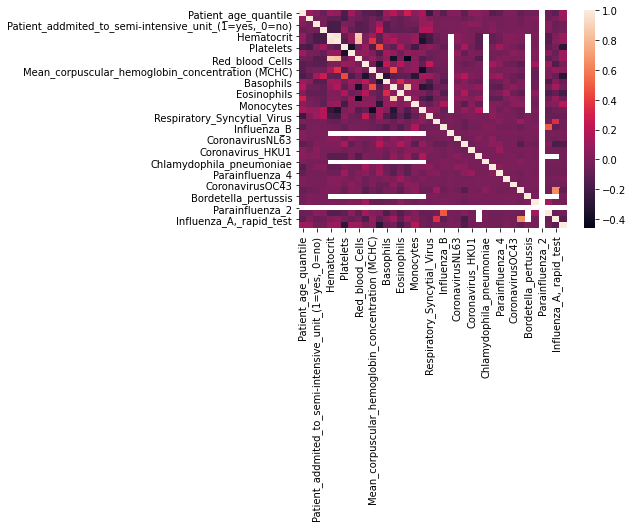

In [ ]:
sb.heatmap(corrM)
plt.show()

In [ ]:
df.isnull().any()

Patient_age_quantile                                     False
Patient_addmited_to_regular_ward_(1=yes,_0=no)           False
Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)    False
Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)    False
Hematocrit                                                True
Hemoglobin                                                True
Platelets                                                 True
Mean_platelet_volume_                                     True
Red_blood_Cells                                           True
Lymphocytes                                               True
Mean_corpuscular_hemoglobin_concentration (MCHC)          True
Leukocytes                                                True
Basophils                                                 True
Mean_corpuscular_hemoglobin_(MCH)                         True
Eosinophils                                               True
Mean_corpuscular_volume_(MCV)                          

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(2005, 38)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 3.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  1.],
       [ 2.,  0.,  0., ...,  0.,  0.,  1.]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC_score:
0.7919613389910419
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.72      0.95      0.82       202
Covid Positive       0.47      0.11      0.17        84

      accuracy                           0.70       286
     macro avg       0.60      0.53      0.50       286
  weighted avg       0.65      0.70      0.63       286

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.75      0.97      0.85      1245
Covid Positive       0.66      0.14      0.23       474

      accuracy                           0.74      1719
     macro avg       0.71      0.56      0.54      1719
  weighted avg       0.72      0.74      0.68      1719

Sensitivity :  0.10714285714285714
Specificity :  0.9504950495049505
Mean accuracy for test set =  0.7027972027972028
Mean accuracy for train set =  0.7428737638161722


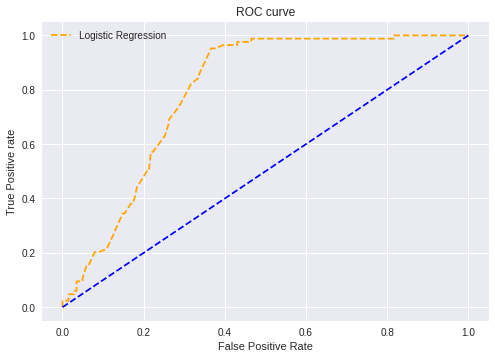

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:37])
                train_data_y.append(data_g[j][w][37])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:37])
                test_data_y.append(data_g[j][w][37])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (286, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1-logistic-regression-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)
    
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print("AUC_score:")
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))
    cm= confusion_matrix(test_data_yn, test_pred_y_log)
    cm
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Specificity : ', specificity) 

    print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
    print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))

    

In [ ]:
    from sklearn import model_selection, metrics
    predtst=clf.predict_proba(test_data_xn)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_data_yn, predtst)
    dfplot=pd.DataFrame({'Threshold':thresh1, 'False Positive Rate':fpr1, 'False Negative Rate': 1.-tpr1})
    ax=dfplot.plot(x='Threshold', y=['False Positive Rate','False Negative Rate'], figsize=(10,6))
    ax.plot([0.00035,0.00035],[0,0.1]) #mark example thresh.
      # roc curve for tpr = fpr 
    

In [ ]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    spec = (tn/(tn+fp))
    sens = (tp/(fn+tp))
    return pd.DataFrame([[tn,fp,spec,sens], [fn,tp,None,None]])

In [ ]:
hardpredtst_tuned_thresh = np.where(predtst >= 0, 1, 0)

In [ ]:
dfk=(conf_matrix(test_data_yn, hardpredtst_tuned_thresh))

In [ ]:
for i in range(1, 100):
  hardpredtst_tuned_thresh = np.where(predtst >= i/100, 1, 0)
  finaldf=(conf_matrix(test_data_yn, hardpredtst_tuned_thresh))
  dfk=dfk.append(finaldf)
print(dfk)
dfk.to_csv('Dataset1_logistic_regression.csv')

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


# **NAIVE BAYES**

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:37])
                train_data_y.append(data_g[j][w][37])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:37])
                test_data_y.append(data_g[j][w][37])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    arr_2d = np.reshape(test_data_yn, (286, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1-Naive-Bayes-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)

    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))
    cm= confusion_matrix(test_data_yn, test_pred_y_log)
    cm
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Specificity : ', specificity) 


    print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
    print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))


In [ ]:
#printing accuracies 
print(cm)
print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

# ***Fisher Linear Discriminant***

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:37])
                train_data_y.append(data_g[j][w][37])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:37])
                test_data_y.append(data_g[j][w][37])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (286, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1-Fishers-linear-discriminant-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))
    cm= confusion_matrix(test_data_yn, test_pred_y_log)
    cm
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Specificity : ', specificity)

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

# **KNN**

In [ ]:
df

In [ ]:
y=df[['SARS-Cov-2_exam_result']] 
y

In [ ]:
x=df.drop(['SARS-Cov-2_exam_result'], axis = 1)
x

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (201, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-KNN-test-results.csv")
    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)

In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)
arr_2d = np.reshape(y_test, (201, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1-XGBoost-test-results.csv")
from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (201, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1-Random-Forest-test-results.csv")
    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (201, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1-SVM-test-results.csv")
    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-1(edited).csv')

total_neg_samples=sum(dataset['SARS-Cov-2_exam_result']==0)
total_pos_samples=sum(dataset['SARS-Cov-2_exam_result']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-Cov-2_exam_result']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-Cov-2_exam_result','index','Patient_ID'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (201, 1))
new_np = np.hstack((X_test,arr_2d))
test_probs = np.reshape(test_probs,(201,1))
finaltocsv= np.hstack((new_np,test_probs))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1-XGBoost(Improved)-test-results.csv")
    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-Cov-2_exam_result'])
test = pd.DataFrame(y_test, columns=['SARS-Cov-2_exam_result'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-Cov-2_exam_result'], pred['SARS-Cov-2_exam_result'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo


MemTotal:       13302928 kB
MemFree:        10561660 kB
MemAvailable:   12526900 kB
Buffers:          143784 kB
Cached:          1950676 kB
SwapCached:            0 kB
Active:          1001300 kB
Inactive:        1503376 kB
Active(anon):     368408 kB
Inactive(anon):      468 kB
Active(file):     632892 kB
Inactive(file):  1502908 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               324 kB
Writeback:             0 kB
AnonPages:        410196 kB
Mapped:           238328 kB
Shmem:              1136 kB
KReclaimable:     141828 kB
Slab:             187004 kB
SReclaimable:     141828 kB
SUnreclaim:        45176 kB
KernelStack:        4768 kB
PageTables:         5520 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651464 kB
Committed_AS:    3037380 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7156 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
python -v

NameError: ignored